# Final Project: Data Cleaning & Exploratory Data Analysis

### Daily_Demand_Forecasting_Orders Dataset

> Author: *Haneul Kim* (ttcielott)

- Repository: https://github.com/ttcielott/haneul_kim/tree/master/Data_Cleaning_Project_03_Daily_Demand_Forecasting_Orders
- Overview & Assesment: https://github.com/ttcielott/haneul_kim/blob/master/Data_Cleaning_Project_03_Daily_Demand_Forecasting_Orders/InitialAssessment.pdf

In [1]:
import pandas as pd

# Raw Data View

In [2]:
df=pd.read_csv('Daily_Demand_Forecasting_Orders.csv', sep=';')
df.head()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517


In [3]:
df.shape

(60, 13)

# Data Wrangling
## 1. Identify and handle missing values

In [4]:
import numpy as np

# convert '?' to 'NaN', Python's default missing value
df.replace('?', np.nan, inplace=True)

In [5]:
# count missing data

missing_data=df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Week of the month (first week, second, third, fourth or fifth week
False    60
Name: Week of the month (first week, second, third, fourth or fifth week, dtype: int64

Day of the week (Monday to Friday)
False    60
Name: Day of the week (Monday to Friday), dtype: int64

Non-urgent order
False    60
Name: Non-urgent order, dtype: int64

Urgent order
False    60
Name: Urgent order, dtype: int64

Order type A
False    60
Name: Order type A, dtype: int64

Order type B
False    60
Name: Order type B, dtype: int64

Order type C
False    60
Name: Order type C, dtype: int64

Fiscal sector orders
False    60
Name: Fiscal sector orders, dtype: int64

Orders from the traffic controller sector
False    60
Name: Orders from the traffic controller sector, dtype: int64

Banking orders (1)
False    60
Name: Banking orders (1), dtype: int64

Banking orders (2)
False    60
Name: Banking orders (2), dtype: int64

Banking orders (3)
False    60
Name: Banking orders (3), dtype: int64

Target (Total orders)


There is no missing value.

## 2. Correct data format

In [6]:
# check data type of each columns
df.dtypes

Week of the month (first week, second, third, fourth or fifth week      int64
Day of the week (Monday to Friday)                                      int64
Non-urgent order                                                      float64
Urgent order                                                          float64
Order type A                                                          float64
Order type B                                                          float64
Order type C                                                          float64
Fiscal sector orders                                                  float64
Orders from the traffic controller sector                               int64
Banking orders (1)                                                      int64
Banking orders (2)                                                      int64
Banking orders (3)                                                      int64
Target (Total orders)                                           

All the columns have numerical values and they have proper data type 'int' or 'float.' However, among the order columns, some have float and others int, so I will unify the data type of the order columns and assuming that the unit is quantity, I will convert the data type to 'int', which indicates 'integer.'

In [7]:
# convert data type
df[['Non-urgent order','Urgent order','Order type A','Order type B','Order type C','Fiscal sector orders','Target (Total orders)']]=df[['Non-urgent order','Urgent order','Order type A','Order type B','Order type C','Fiscal sector orders','Target (Total orders)']].astype('int')

In [8]:
df.dtypes

Week of the month (first week, second, third, fourth or fifth week    int64
Day of the week (Monday to Friday)                                    int64
Non-urgent order                                                      int64
Urgent order                                                          int64
Order type A                                                          int64
Order type B                                                          int64
Order type C                                                          int64
Fiscal sector orders                                                  int64
Orders from the traffic controller sector                             int64
Banking orders (1)                                                    int64
Banking orders (2)                                                    int64
Banking orders (3)                                                    int64
Target (Total orders)                                                 int64
dtype: objec

## 3. Data standardization

In [9]:
#rename the column names

df.rename(columns={'Week of the month (first week, second, third, fourth or fifth week':'Week of the month'}, inplace=True)
df.rename(columns={'Day of the week (Monday to Friday)':'Day of the week'}, inplace=True)
df.head()

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316,223,61,175,302,0,65556,44914,188411,14793,539
1,1,5,128,96,38,56,130,0,40419,21399,89461,7679,224
2,1,6,43,84,21,25,82,1,11992,3452,21305,14947,129
3,2,2,171,127,41,113,162,18,49971,33703,69054,18423,317
4,2,3,90,113,37,56,116,6,48534,19646,16411,20257,210


In [10]:
# list the unique inputs of the column 'Week of the month'
df['Week of the month'].unique()

array([1, 2, 3, 4, 5])

In [11]:
# list the unique inputs of the column 'Day of the week'
df['Day of the week'].unique()

array([4, 5, 6, 2, 3])

In [12]:
# transform numerical values of 'Week of the month' to a common format, 'N th week'.
df['Week of the month'].replace(1, '1st week', inplace=True)
df['Week of the month'].replace(2, '2nd week', inplace=True)
df['Week of the month'].replace(3, '3rd week', inplace=True)
df['Week of the month'].replace(4, '4th week', inplace=True)
df['Week of the month'].replace(5, '5th week', inplace=True)

# transform numerical values of 'Day of the week' to a common format, 'Mon to Fri'
df['Day of the week'].replace(2, 'Mon', inplace=True)
df['Day of the week'].replace(3, 'Tue', inplace=True)
df['Day of the week'].replace(4, 'Wed', inplace=True)
df['Day of the week'].replace(5, 'Thu', inplace=True)
df['Day of the week'].replace(6, 'Fri', inplace=True)

In [13]:
df.head()

,Week of the month,Day of the week,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1st week,Wed,316,223,61,175,302,0,65556,44914,188411,14793,539
1,1st week,Thu,128,96,38,56,130,0,40419,21399,89461,7679,224
2,1st week,Fri,43,84,21,25,82,1,11992,3452,21305,14947,129
3,2nd week,Mon,171,127,41,113,162,18,49971,33703,69054,18423,317
4,2nd week,Tue,90,113,37,56,116,6,48534,19646,16411,20257,210


In [14]:
# export a clean data to csv file with separator, ',' 
df.to_csv('cleaned_data.csv', sep=',', index=False)

# Exploratory Data Analysis
## 1. Analyzing individual feature pattern using visualization

In [15]:
# calculate the statistics of categorical data
df.describe(include='object')

,Week of the month,Day of the week
count,60,60
unique,5,5
top,2nd week,Wed
freq,15,13


In [16]:
# count the number of each unique inputs
df['Week of the month'].value_counts()

2nd week    15
3rd week    14
4th week    14
5th week     9
1st week     8
Name: Week of the month, dtype: int64

In [17]:
# count the number of each unique inputs
df['Day of the week'].value_counts()

Wed    13
Thu    12
Tue    12
Fri    12
Mon    11
Name: Day of the week, dtype: int64

In [18]:
# calculate the statisctics of numerical data
df.describe()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,172.066667,118.466667,51.650000,108.733333,139.033333,77.133333,44504.350000,46640.833333,79401.483333,23114.633333,300.400000
std,69.508167,27.165199,18.842636,50.751928,41.433617,186.593410,12197.905134,45220.736293,40504.420041,13148.039829,89.546163
min,43.000000,77.000000,21.000000,25.000000,74.000000,0.000000,11992.000000,3452.000000,16411.000000,7679.000000,129.000000
25%,125.250000,100.750000,39.000000,74.250000,112.750000,1.000000,34994.250000,20130.000000,50680.500000,12609.750000,237.500000
50%,150.500000,112.500000,47.000000,99.000000,127.500000,7.500000,44312.000000,32527.500000,67181.000000,18011.500000,287.500000
75%,193.750000,131.500000,58.000000,132.000000,159.750000,20.250000,52111.750000,45118.750000,94787.750000,31047.750000,333.750000
max,435.000000,223.000000,118.000000,267.000000,302.000000,865.000000,71772.000000,210508.000000,188411.000000,73839.000000,616.000000


Text(0, 0.5, 'count')

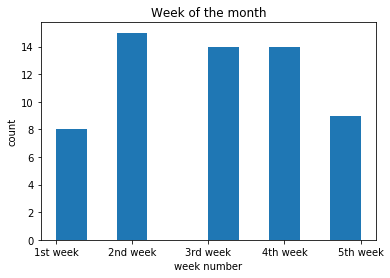

In [19]:
# plot the histogram of 'Week of the month' to see what its distribution looks like 
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['Week of the month'])

# set x/y labels and plot title
plt.pyplot.title('Week of the month')
plt.pyplot.xlabel('week number')
plt.pyplot.ylabel('count')

We can see the numbers of collected data for 1st and 5th week are relatively low compared to other weeks.

Text(0, 0.5, 'count')

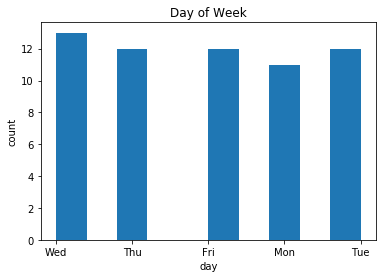

In [20]:
# plot the histogram of day of week to see what its distribution looks like 
plt.pyplot.hist(df['Day of the week'])

# set x/y labels and plot title
plt.pyplot.title('Day of Week')
plt.pyplot.xlabel('day')
plt.pyplot.ylabel('count')

We can see data are evenly distributed among all day

To install 'Seaborn',visualization library, I will use the pip, which is the Python package manager.

In [25]:
%%capture
! pip install seaborn

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# calculate the correlation between numerical variables.
df.corr()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
Non-urgent order,1.000000,0.566256,0.561583,0.827319,0.753066,-0.056234,0.246281,0.732638,0.788130,0.133319,0.934594
Urgent order,0.566256,1.000000,0.414365,0.509321,0.768196,-0.011328,0.242572,0.231462,0.662392,0.030692,0.730323
Order type A,0.561583,0.414365,1.000000,0.439342,0.217525,0.066033,-0.154998,0.675464,0.295863,0.231485,0.558167
Order type B,0.827319,0.509321,0.439342,1.000000,0.524800,-0.122272,0.127188,0.593079,0.714208,0.066405,0.900876
Order type C,0.753066,0.768196,0.217525,0.524800,1.000000,0.007425,0.441532,0.331272,0.718195,0.031789,0.806015
Fiscal sector orders,-0.056234,-0.011328,0.066033,-0.122272,0.007425,1.000000,0.197799,0.003814,-0.054635,0.294374,-0.051618
Orders from the traffic controller sector,0.246281,0.242572,-0.154998,0.127188,0.441532,0.197799,1.000000,-0.162309,0.240450,0.231614,0.244684
Banking orders (1),0.732638,0.231462,0.675464,0.593079,0.331272,0.003814,-0.162309,1.000000,0.262905,0.221335,0.630360
Banking orders (2),0.788130,0.662392,0.295863,0.714208,0.718195,-0.054635,0.240450,0.262905,1.000000,-0.108797,0.798443
Banking orders (3),0.133319,0.030692,0.231485,0.066405,0.031789,0.294374,0.231614,0.221335,-0.108797,1.000000,0.100800


If you see the last row, you can find the correlation between individual variables and Total orders. 
The closer the value is to 1 is the stronger positive linear correlation.
The closer the value is to -1 is the stronger negative linear correlation.
The closer the value is to 0 the less correlation exists.

### Non-Urgent order VS Total Order

(0, 677.001603807337)

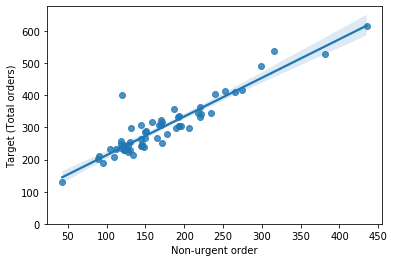

In [28]:
sns.regplot(x='Non-urgent order', y='Target (Total orders)', data=df)
plt.ylim(0,)

As the non-urgent order goes up, the total order goes up: This indicates a positive linear relationship between two variables. Non-urgent order could potentially be a predictor of total order. 

Let's examine the correlation between 'Non-urgent order' and 'Total order' and see it's approximately 0.934594.

In [29]:
df[['Non-urgent order','Target (Total orders)']].corr()

,Non-urgent order,Target (Total orders)
Non-urgent order,1.000000,0.934594
Target (Total orders),0.934594,1.000000


### Fiscal sector orders VS Total order

(0, 640.3666942604857)

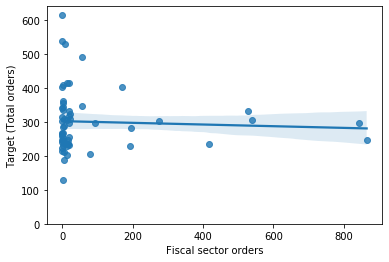

In [30]:
sns.regplot(x='Fiscal sector orders', y='Target (Total orders)',data=df)
plt.ylim(0,)

Fiscal sector orders doesn't seems like a good predictor of Total order at all since the regression line is closed to horizontal. Also, the data points are very scattered and far from the fitted line, showing a lot of variability. Therefore, it's not a reliable variable.

Let's examamine the correlation between 'fiscal sector orders' and 'total order' and see it's approximately -0.051618.

In [31]:
df[['Fiscal sector orders','Target (Total orders)']].corr()

,Fiscal sector orders,Target (Total orders)
Fiscal sector orders,1.000000,-0.051618
Target (Total orders),-0.051618,1.000000


### Week of the Month VS Total Order

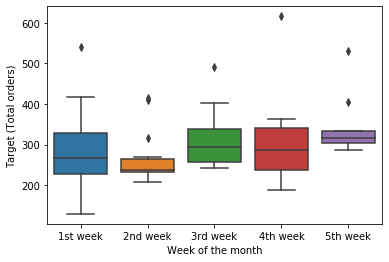

In [32]:
# using boxplot, see the rationship between 'week of the month' and 'total order'
sns.boxplot(x='Week of the month', y='Target (Total orders)', data=df)

Here we can see that the distribution of the total order between each weeks have a significant overlap. Therefore, week of month would not be a good predictor of total order. 

### Day of the week VS Total Order

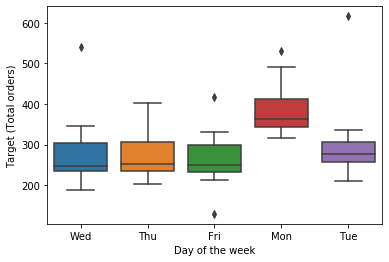

In [33]:
sns.boxplot(x='Day of the week', y='Target (Total orders)', data=df)

Here we can see that the distributions of total order between Monday category and the other days of week are distinct enough to take 'day of the week' as a potential good predictor of total order. 

### Week of the month, Day of the week VS Total order

In [34]:
# pick out the relevant columns.
df_gr=df[['Week of the month','Day of the week','Target (Total orders)']]

In [35]:
# group the total order by two variables
df_gr=df_gr.groupby(['Week of the month','Day of the week'], as_index=False).mean()
df_gr

,Week of the month,Day of the week,Target (Total orders)
0,1st week,Fri,280.666667
1,1st week,Thu,230.000000
2,1st week,Tue,298.000000
3,1st week,Wed,384.000000
4,2nd week,Fri,240.000000
5,2nd week,Mon,380.333333
6,2nd week,Thu,244.000000
7,2nd week,Tue,236.333333
8,2nd week,Wed,226.333333
9,3rd week,Fri,281.500000


In [36]:
# convert table into pivot
df_gr_pivot=df_gr.pivot(index='Week of the month', columns='Day of the week')
df_gr_pivot

Target (Total orders)                                      \
Day of the week                     Fri         Mon         Thu         Tue   
Week of the month                                                             
1st week                     280.666667         NaN  230.000000  298.000000   
2nd week                     240.000000  380.333333  244.000000  236.333333   
3rd week                     281.500000  397.000000  322.666667  265.333333   
4th week                     233.000000  352.500000  272.333333  406.666667   
5th week                     331.000000  416.666667  304.000000  309.500000   

                               
Day of the week           Wed  
Week of the month              
1st week           384.000000  
2nd week           226.333333  
3rd week           274.333333  
4th week           260.000000  
5th week           304.500000

In [37]:
# fill the missing value with 0
df_gr_pivot=df_gr_pivot.fillna(0)
df_gr_pivot

Target (Total orders)                                      \
Day of the week                     Fri         Mon         Thu         Tue   
Week of the month                                                             
1st week                     280.666667    0.000000  230.000000  298.000000   
2nd week                     240.000000  380.333333  244.000000  236.333333   
3rd week                     281.500000  397.000000  322.666667  265.333333   
4th week                     233.000000  352.500000  272.333333  406.666667   
5th week                     331.000000  416.666667  304.000000  309.500000   

                               
Day of the week           Wed  
Week of the month              
1st week           384.000000  
2nd week           226.333333  
3rd week           274.333333  
4th week           260.000000  
5th week           304.500000

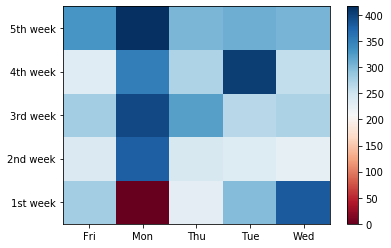

In [38]:
# visualize the pivot table using heatmap
fig, ax = plt.subplots()
im = ax.pcolor(df_gr_pivot, cmap='RdBu')

#label names
row_labels = df_gr_pivot.columns.levels[1]
col_labels = df_gr_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_gr_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_gr_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
plt.show()

## 2. Correlation and its statistical siginificance

Using pearson coefficient and p-value, we will see correlaitons between variables and total order and how much each correlations is statistically significant.

In [39]:
from scipy import stats

In [40]:
df.corr()

,Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
Non-urgent order,1.000000,0.566256,0.561583,0.827319,0.753066,-0.056234,0.246281,0.732638,0.788130,0.133319,0.934594
Urgent order,0.566256,1.000000,0.414365,0.509321,0.768196,-0.011328,0.242572,0.231462,0.662392,0.030692,0.730323
Order type A,0.561583,0.414365,1.000000,0.439342,0.217525,0.066033,-0.154998,0.675464,0.295863,0.231485,0.558167
Order type B,0.827319,0.509321,0.439342,1.000000,0.524800,-0.122272,0.127188,0.593079,0.714208,0.066405,0.900876
Order type C,0.753066,0.768196,0.217525,0.524800,1.000000,0.007425,0.441532,0.331272,0.718195,0.031789,0.806015
Fiscal sector orders,-0.056234,-0.011328,0.066033,-0.122272,0.007425,1.000000,0.197799,0.003814,-0.054635,0.294374,-0.051618
Orders from the traffic controller sector,0.246281,0.242572,-0.154998,0.127188,0.441532,0.197799,1.000000,-0.162309,0.240450,0.231614,0.244684
Banking orders (1),0.732638,0.231462,0.675464,0.593079,0.331272,0.003814,-0.162309,1.000000,0.262905,0.221335,0.630360
Banking orders (2),0.788130,0.662392,0.295863,0.714208,0.718195,-0.054635,0.240450,0.262905,1.000000,-0.108797,0.798443
Banking orders (3),0.133319,0.030692,0.231485,0.066405,0.031789,0.294374,0.231614,0.221335,-0.108797,1.000000,0.100800


In the table above, the following features have the moderate to strong linear correlation with total order.
- Non-urgent order
- Urgent order
- Order type A
- Order type B
- Order type C
- Banking orders (1)
- Banking orders (2)

In [41]:
list=['Non-urgent order', 'Urgent order', 'Order type A','Order type B', 'Order type C','Banking orders (1)','Banking orders (2)']

In [42]:
class color:
   BOLD = '\033[1m'
   END = '\033[0m'

In [43]:
for a in list:
    pearson_coef, p_value=stats.pearsonr(df[a],df['Target (Total orders)'])
    print(color.BOLD + a,'VS Total Order' +color.END)
    print('')
    print('Pearson Correlation Coefficient:', pearson_coef, 'P-value:', p_value)
    print('')
    if p_value <0.001:
        print('-The correlation between ', a, 'and total order is statistically significant.\n')
    elif p_value <0.05:
        print('-The correlation between ', a, 'and total order is moderately significant.\n')
    elif p_value <0.1:
        print('-The correlation between ', a, 'and total order is weak.\n')
    elif p_value >0.1:
        print('-The correlation between ', a, 'and total order is not significant.\n')
    if pearson_coef > 0.85:
        print('The linear relationship is very strong.')
    elif pearson_coef > 0.75:
        print('The linear relationship is quite strong.')
    elif pearson_coef > 0.65:
        print('The linear relationship is moderately strong.')
    elif pearson_coef > 0.55:
        print('The linear relationship is only maderate.')
    print('')
    print('')

Non-urgent order VS Total Order

Pearson Correlation Coefficient: 0.9345941964298121 P-value: 1.0248667433179892e-27

-The correlation between  Non-urgent order and total order is statistically significant.

The linear relationship is very strong.


Urgent order VS Total Order

Pearson Correlation Coefficient: 0.7303228270752169 P-value: 3.539024106818203e-11

-The correlation between  Urgent order and total order is statistically significant.

The linear relationship is moderately strong.


Order type A VS Total Order

Pearson Correlation Coefficient: 0.5581665480892053 P-value: 3.5901929664453573e-06

-The correlation between  Order type A and total order is statistically significant.

The linear relationship is only maderate.


Order type B VS Total Order

Pearson Correlation Coefficient: 0.9008764088584853 P-value: 1.098550955880378e-22

-The correlation between  Order type B and total order is statistically significant.

The linear relationship is very strong.


Order type C VS To

## 3. ANOVA (Analysis of Variance)

Through ANOVA statistical method, I will test whether there are significant differences between the means of total orders between each weeks of month and means of total order beteween each days of the week.  

### Week of the month
Let's see if different weeks of the month impact total order.

In [44]:
# group the total order by week of the month
df_gr2=df[['Week of the month','Target (Total orders)']].groupby(['Week of the month'])
df_gr2.head(2)

,Week of the month,Target (Total orders)
0,1st week,539
1,1st week,224
3,2nd week,317
4,2nd week,210
8,3rd week,344
9,3rd week,248
13,4th week,363
14,4th week,336
18,5th week,404
36,5th week,530


In [45]:
# ANOVA
f_val, p_val = stats.f_oneway(df_gr2.get_group('1st week')['Target (Total orders)'],
                             df_gr2.get_group('2nd week')['Target (Total orders)'],
                             df_gr2.get_group('3rd week')['Target (Total orders)'],
                             df_gr2.get_group('4th week')['Target (Total orders)'],
                             df_gr2.get_group('5th week')['Target (Total orders)'],)
print('ANOVA results F=', f_val, 'P=', p_val)

ANOVA results F= 1.2173887697871841 P= 0.31399030361075575


It is not very good result with a small F test score showing a weak correlation and P value of over 0.1 implying no statistical significance.

### Day of the week

Let's see if different days of the week impact total order.

In [46]:
# group the total order by day of the week
df_gr3=df[['Day of the week','Target (Total orders)']].groupby(['Day of the week'])
df_gr3.head(2)

,Day of the week,Target (Total orders)
0,Wed,539
1,Thu,224
2,Fri,129
3,Mon,317
4,Tue,210
5,Wed,207
6,Thu,263
7,Fri,248
8,Mon,344
9,Tue,248


In [47]:
# ANOVA
f_val, p_val = stats.f_oneway(df_gr3.get_group('Mon')['Target (Total orders)'],
                             df_gr3.get_group('Tue')['Target (Total orders)'],
                             df_gr3.get_group('Wed')['Target (Total orders)'],
                             df_gr3.get_group('Thu')['Target (Total orders)'],
                             df_gr3.get_group('Fri')['Target (Total orders)'],)
print('ANOVA results F=', f_val, 'P=', p_val)

ANOVA results F= 4.576879713532475 P= 0.0029123226062454746


It is not very good result neither with a small F test score showing a weak correlation and P value implying moderate statistical significance. However, considering the previous boxplot showing distinct difference in distribution of total order between Monday and the rest day, we will test whether the mean of Monday's total order deviates from the mean of the other days' total order.

### Monday VS Tuesday

In [48]:
# ANOVA
f_val, p_val = stats.f_oneway(df_gr3.get_group('Mon')['Target (Total orders)'],
                             df_gr3.get_group('Tue')['Target (Total orders)'],)
print('ANOVA results F=', f_val, 'P=', p_val)

ANOVA results F= 5.285669168965373 P= 0.03186505052791845


### Monday VS Wednesday

In [49]:
# ANOVA
f_val, p_val = stats.f_oneway(df_gr3.get_group('Mon')['Target (Total orders)'],
                             df_gr3.get_group('Wed')['Target (Total orders)'],)
print('ANOVA results F=', f_val, 'P=', p_val)

ANOVA results F= 10.708032242269026 P= 0.0034833037555314535


### Monday VS Thursday

In [50]:
# ANOVA
f_val, p_val = stats.f_oneway(df_gr3.get_group('Mon')['Target (Total orders)'],
                             df_gr3.get_group('Thu')['Target (Total orders)'],)
print('ANOVA results F=', f_val, 'P=', p_val)

ANOVA results F= 19.624644455947426 P= 0.00023241299502083773


### Monday VS Friday

In [51]:
# ANOVA
f_val, p_val = stats.f_oneway(df_gr3.get_group('Mon')['Target (Total orders)'],
                             df_gr3.get_group('Fri')['Target (Total orders)'],)
print('ANOVA results F=', f_val, 'P=', p_val)

ANOVA results F= 18.94284950970739 P= 0.00027979395525757435


According to ANOVA, there is no significant difference between the means of Monday's total order and that of the other days'. 

## Conclusion: Important Variables

The following variables are important to take into account when predicting total order:

Continuous numerical variables:
- Non-urgent order
- Urgent order
- Order type A
- Order type B
- Order type C
- Banking orders (1)
- Banking orders (2)